<a href="https://colab.research.google.com/github/WardaAli-00/Programming-For-Ai-Assignment/blob/main/paper_implementation_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer, StandardScaler
import seaborn as sns

In [ ]:
!pip install emoji
import pandas as pd
import emoji
import re
import nltk
from nltk.corpus import stopwords
# import matplotlib.pyplot as plot
import matplotlib.pyplot as plt
import numpy as np


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.9/586.9 kB 7.1 MB/s eta 0:00:00


In [ ]:
df_one = pd.read_csv('/content/drive/MyDrive/Step_one.csv')
df_two = pd.read_csv('/content/drive/MyDrive/Step_two.csv')
df_three = pd.read_csv('/content/drive/MyDrive/Step_three.csv')
print(df_three.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22742 entries, 0 to 22741
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   created_at  22742 non-null  object
 1   user_id     22742 non-null  int64 
 2   username    22742 non-null  object
 3   tweet       22742 non-null  object
 4   place       6178 non-null   object
 5   near        22742 non-null  object
dtypes: int64(1), object(5)
memory usage: 1.0+ MB
None


In [ ]:
#merge all the datasets
all_df=[df_one, df_two, df_three]
all_df=pd.concat(all_df)
all_df = all_df.reset_index(drop=True)
print(len(all_df))

77378


In [ ]:
empty_tweet=all_df['tweet'].isna().value_counts()
print(empty_tweet) #no empty tweets

tweet
False    77378
Name: count, dtype: int64


In [ ]:
all_df['clean_tweet']= all_df['tweet'].copy()
all_df=all_df.drop('id', axis=1)
all_df

,created_at,user_id,username,tweet,place,near,clean_tweet
0,2021-01-06 23:43:48 GMT 标准时间,293175196,sjtafalla,UK Parliament: 2nd Covid Vaccine should be 21 ...,NaN,London,UK Parliament: 2nd Covid Vaccine should be 21 ...
1,2021-01-06 23:43:16 GMT 标准时间,1591779799,ellieelif,First dose of vaccination 💉 5/1/2021..to comba...,NaN,London,First dose of vaccination 💉 5/1/2021..to comba...
2,2021-01-06 23:40:17 GMT 标准时间,215143656,danananarama,"Time to forget about #COVID, #Brexit and #Trum...",NaN,London,"Time to forget about #COVID, #Brexit and #Trum..."
3,2021-01-06 23:36:32 GMT 标准时间,336462129,veronica_foote_,@doctor_oxford Rachel you absolutely nailed it...,NaN,London,@doctor_oxford Rachel you absolutely nailed it...
4,2021-01-06 23:33:50 GMT 标准时间,1063705581133934593,5herii,My kids can never say they don’t wanna do thei...,NaN,London,My kids can never say they don’t wanna do thei...
...,...,...,...,...,...,...,...
77373,2021-05-20,1161700993840680961,PhilipCrook9,Very little interest by politicians and media ...,"{'type': 'Feature', 'bbox': [-1.476463, 50.883...","Southampton, England",Very little interest by politicians and media ...
77374,2021-05-19,146596633,edwardjsault,#BREAKING Health Secretary Matt Hancock has an...,"{'type': 'Feature', 'bbox': [-1.476463, 50.883...","Southampton, England",#BREAKING Health Secretary Matt Hancock has an...
77375,2021-05-19,235304684,phoTomics,“Hundreds of flights full of Indian corona” co...,"{'type': 'Feature', 'bbox': [-1.476463, 50.883...","Southampton, England",“Hundreds of flights full of Indian corona” co...
77376,2021-05-17,726443182997835778,SarahClift10,Sadiq Khan asks for vaccine blitz in variant-h...,"{'type': 'Feature', 'bbox': [-1.476463, 50.883...","Southampton, England",Sadiq Khan asks for vaccine blitz in variant-h...


In [ ]:
def convert_emoji(text):
    text=[emoji.demojize(tw) for tw in text]  #run slowly
    new_df= pd.DataFrame(text, columns=['tweet'])
    return new_df
new_df=convert_emoji(all_df['clean_tweet'])
new_df

,tweet
0,UK Parliament: 2nd Covid Vaccine should be 21 ...
1,First dose of vaccination :syringe: 5/1/2021.....
2,"Time to forget about #COVID, #Brexit and #Trum..."
3,@doctor_oxford Rachel you absolutely nailed it...
4,My kids can never say they don’t wanna do thei...
...,...
77373,Very little interest by politicians and media ...
77374,#BREAKING Health Secretary Matt Hancock has an...
77375,“Hundreds of flights full of Indian corona” co...
77376,Sadiq Khan asks for vaccine blitz in variant-h...


In [ ]:
all_df[['clean_tweet']]=new_df[['tweet']].copy()
all_df

,created_at,user_id,username,tweet,place,near,clean_tweet
0,2021-01-06 23:43:48 GMT 标准时间,293175196,sjtafalla,UK Parliament: 2nd Covid Vaccine should be 21 ...,NaN,London,UK Parliament: 2nd Covid Vaccine should be 21 ...
1,2021-01-06 23:43:16 GMT 标准时间,1591779799,ellieelif,First dose of vaccination 💉 5/1/2021..to comba...,NaN,London,First dose of vaccination :syringe: 5/1/2021.....
2,2021-01-06 23:40:17 GMT 标准时间,215143656,danananarama,"Time to forget about #COVID, #Brexit and #Trum...",NaN,London,"Time to forget about #COVID, #Brexit and #Trum..."
3,2021-01-06 23:36:32 GMT 标准时间,336462129,veronica_foote_,@doctor_oxford Rachel you absolutely nailed it...,NaN,London,@doctor_oxford Rachel you absolutely nailed it...
4,2021-01-06 23:33:50 GMT 标准时间,1063705581133934593,5herii,My kids can never say they don’t wanna do thei...,NaN,London,My kids can never say they don’t wanna do thei...
...,...,...,...,...,...,...,...
77373,2021-05-20,1161700993840680961,PhilipCrook9,Very little interest by politicians and media ...,"{'type': 'Feature', 'bbox': [-1.476463, 50.883...","Southampton, England",Very little interest by politicians and media ...
77374,2021-05-19,146596633,edwardjsault,#BREAKING Health Secretary Matt Hancock has an...,"{'type': 'Feature', 'bbox': [-1.476463, 50.883...","Southampton, England",#BREAKING Health Secretary Matt Hancock has an...
77375,2021-05-19,235304684,phoTomics,“Hundreds of flights full of Indian corona” co...,"{'type': 'Feature', 'bbox': [-1.476463, 50.883...","Southampton, England",“Hundreds of flights full of Indian corona” co...
77376,2021-05-17,726443182997835778,SarahClift10,Sadiq Khan asks for vaccine blitz in variant-h...,"{'type': 'Feature', 'bbox': [-1.476463, 50.883...","Southampton, England",Sadiq Khan asks for vaccine blitz in variant-h...


In [ ]:
#simple data cleaning
def preprocessing_one(df):
    #lower all characters
    df['clean_tweet'] = df['clean_tweet'].str.lower()
    #remove all the mentions: @username
    df['clean_tweet'] = df['clean_tweet'].replace(r'@\w+', '', regex=True)
    #remove all the links in the original tweets (start with "www" and "http")
    df['clean_tweet'] = df['clean_tweet'].replace(r'http\S+|rhttps\S+|rwww\S+', '', regex=True)
    return df
#Notice: Remove punctuation and special characters after handling contraction words
preprocessing_one(all_df)

,created_at,user_id,username,tweet,place,near,clean_tweet
0,2021-01-06 23:43:48 GMT 标准时间,293175196,sjtafalla,UK Parliament: 2nd Covid Vaccine should be 21 ...,NaN,London,uk parliament: 2nd covid vaccine should be 21 ...
1,2021-01-06 23:43:16 GMT 标准时间,1591779799,ellieelif,First dose of vaccination 💉 5/1/2021..to comba...,NaN,London,first dose of vaccination :syringe: 5/1/2021.....
2,2021-01-06 23:40:17 GMT 标准时间,215143656,danananarama,"Time to forget about #COVID, #Brexit and #Trum...",NaN,London,"time to forget about #covid, #brexit and #trum..."
3,2021-01-06 23:36:32 GMT 标准时间,336462129,veronica_foote_,@doctor_oxford Rachel you absolutely nailed it...,NaN,London,rachel you absolutely nailed it tonight on t...
4,2021-01-06 23:33:50 GMT 标准时间,1063705581133934593,5herii,My kids can never say they don’t wanna do thei...,NaN,London,my kids can never say they don’t wanna do thei...
...,...,...,...,...,...,...,...
77373,2021-05-20,1161700993840680961,PhilipCrook9,Very little interest by politicians and media ...,"{'type': 'Feature', 'bbox': [-1.476463, 50.883...","Southampton, England",very little interest by politicians and media ...
77374,2021-05-19,146596633,edwardjsault,#BREAKING Health Secretary Matt Hancock has an...,"{'type': 'Feature', 'bbox': [-1.476463, 50.883...","Southampton, England",#breaking health secretary matt hancock has an...
77375,2021-05-19,235304684,phoTomics,“Hundreds of flights full of Indian corona” co...,"{'type': 'Feature', 'bbox': [-1.476463, 50.883...","Southampton, England",“hundreds of flights full of indian corona” co...
77376,2021-05-17,726443182997835778,SarahClift10,Sadiq Khan asks for vaccine blitz in variant-h...,"{'type': 'Feature', 'bbox': [-1.476463, 50.883...","Southampton, England",sadiq khan asks for vaccine blitz in variant-h...


In [ ]:
#Handling repeated characters
#reference: https://github.com/ugis22/analysing_twitter/blob/master/Jupyter%20Notebook%20files/Analysis%20of%20Twitter.ipynb
#https://stackoverflow.com/questions/3788870/how-to-check-if-a-word-is-an-english-word-with-python
nltk.download('wordnet')
from nltk.corpus import wordnet

#re.sub(pattern, repl, string, count): pattern(Eligible pattern)，repl(replace to...), string
def repeated_char(word):
    repeat_pattern = re.compile(r'(\w*)(\w)\2(\w*)')
    repl_word = r'\1\2\3'
    if wordnet.synsets(word):
        return word  #test for words existence
    #repl_new= repeat_pattern.sub(repl_word, word)
    repl_new = re.sub(repeat_pattern, repl_word, word)
    if repl_new != word:
        return repeated_char(repl_new)
    else:
        return repl_new
word1='loooove'
print(repeated_char(word1))

[nltk_data] Downloading package wordnet to /root/nltk_data...


love


In [ ]:
def check_repeated (tweet):
    repeat_pattern = r'(\w*)(\w+)(\2)(\w*)'
    word_set = [''.join(i) for i in re.findall(repeat_pattern, tweet)]  #find all the words with repeated characters
    for word in word_set:
        if not wordnet.synsets(word):
            tweet=re.sub(word, repeated_char(word), tweet)
    return tweet
#test the function
tweet1='I looove you, soooo much'
print(check_repeated (tweet1))

I love you, so much


In [ ]:
contraction_dict=[(r'I\'m', 'I am'),(r'i\'m', 'i am'),(r'ain\'t', 'am not'),(r'(\w+)\'s', '\g<1> is'),(r'(\w+)\'re', '\g<1> are'),(r'(\w+)n\'t', '\g<1> not'),
                  (r'can\'t', 'cannot'),(r'won\'t', 'will not'), (r'wont', 'will not'), (r'(\w+)\'ll', '\g<1> will'), (r'(\w+)\'d', '\g<1> would'), (r'(\w+)\'ve', '\g<1> have'),
                 (r'I\’m', 'I am'),(r'i\’m', 'i am'),(r'ain\’t', 'am not'),(r'(\w+)\’s', '\g<1> is'),(r'(\w+)\’re', '\g<1> are'),(r'(\w+)n\’t', '\g<1> not'),
                  (r'can\’t', 'cannot'),(r'won\’t', 'will not'), (r'(\w+)\’ll', '\g<1> will'), (r'(\w+)\’d', '\g<1> would'), (r'(\w+)\’ve', '\g<1> have')]
#Notice: The quotation of some texts are not in English
def handle_contraction(text):
    patterns_set=[(re.compile(pattern), repl) for (pattern, repl) in contraction_dict]
    for (pattern, repl) in patterns_set:
        text=re.sub(pattern, repl, text)
    return text
#test
print(all_df['clean_tweet'][4])
print(handle_contraction(all_df['clean_tweet'][4]))

my kids can never say they don’t wanna do their homework. i’ve got :sparkles:covid 19 :sparkles: and i’m still banging out my 2,000 word essay, you have no excuse x
my kids can never say they do not wanna do their homework. i have got :sparkles:covid 19 :sparkles: and i am still banging out my 2,000 word essay, you have no excuse x


In [ ]:
def preprocessing_two(df):
    df['clean_tweet'] = df['clean_tweet'].apply(lambda x: check_repeated(x)) #remove repeated charaters
    df['clean_tweet'] = df['clean_tweet'].apply(lambda x: handle_contraction(x)) #handle constraction
    return df
all_df=preprocessing_two(all_df)
all_df

,created_at,user_id,username,tweet,place,near,clean_tweet
0,2021-01-06 23:43:48 GMT 标准时间,293175196,sjtafalla,UK Parliament: 2nd Covid Vaccine should be 21 ...,NaN,London,uk parliament: 2nd covid vaccine should be 21 ...
1,2021-01-06 23:43:16 GMT 标准时间,1591779799,ellieelif,First dose of vaccination 💉 5/1/2021..to comba...,NaN,London,first dose of vaccination :syringe: 5/1/2021.....
2,2021-01-06 23:40:17 GMT 标准时间,215143656,danananarama,"Time to forget about #COVID, #Brexit and #Trum...",NaN,London,"time to forget about #covid, #brexit and #trum..."
3,2021-01-06 23:36:32 GMT 标准时间,336462129,veronica_foote_,@doctor_oxford Rachel you absolutely nailed it...,NaN,London,rachel you absolutely nailed it tonight on t...
4,2021-01-06 23:33:50 GMT 标准时间,1063705581133934593,5herii,My kids can never say they don’t wanna do thei...,NaN,London,my kids can never say they do not wana do thei...
...,...,...,...,...,...,...,...
77373,2021-05-20,1161700993840680961,PhilipCrook9,Very little interest by politicians and media ...,"{'type': 'Feature', 'bbox': [-1.476463, 50.883...","Southampton, England",very little interest by politicians and media ...
77374,2021-05-19,146596633,edwardjsault,#BREAKING Health Secretary Matt Hancock has an...,"{'type': 'Feature', 'bbox': [-1.476463, 50.883...","Southampton, England",#breaking health secretary matt hancock has an...
77375,2021-05-19,235304684,phoTomics,“Hundreds of flights full of Indian corona” co...,"{'type': 'Feature', 'bbox': [-1.476463, 50.883...","Southampton, England",“hundreds of flights full of indian corona” co...
77376,2021-05-17,726443182997835778,SarahClift10,Sadiq Khan asks for vaccine blitz in variant-h...,"{'type': 'Feature', 'bbox': [-1.476463, 50.883...","Southampton, England",sadiq khan asks for vaccine blitz in variant-h...


In [ ]:
#only English character
def replace_non_alphabetical(df):
    df['clean_tweet']=df['clean_tweet'].replace('[^a-zA-Z]',' ', regex=True)
    df['clean_tweet'] = df['clean_tweet'].replace('\s+', ' ', regex=True)
    return df
all_df=replace_non_alphabetical(all_df)
all_df

,created_at,user_id,username,tweet,place,near,clean_tweet
0,2021-01-06 23:43:48 GMT 标准时间,293175196,sjtafalla,UK Parliament: 2nd Covid Vaccine should be 21 ...,NaN,London,uk parliament nd covid vaccine should be days ...
1,2021-01-06 23:43:16 GMT 标准时间,1591779799,ellieelif,First dose of vaccination 💉 5/1/2021..to comba...,NaN,London,first dose of vaccination syringe to combating...
2,2021-01-06 23:40:17 GMT 标准时间,215143656,danananarama,"Time to forget about #COVID, #Brexit and #Trum...",NaN,London,time to forget about covid brexit and trump an...
3,2021-01-06 23:36:32 GMT 标准时间,336462129,veronica_foote_,@doctor_oxford Rachel you absolutely nailed it...,NaN,London,rachel you absolutely nailed it tonight on th...
4,2021-01-06 23:33:50 GMT 标准时间,1063705581133934593,5herii,My kids can never say they don’t wanna do thei...,NaN,London,my kids can never say they do not wana do thei...
...,...,...,...,...,...,...,...
77373,2021-05-20,1161700993840680961,PhilipCrook9,Very little interest by politicians and media ...,"{'type': 'Feature', 'bbox': [-1.476463, 50.883...","Southampton, England",very little interest by politicians and media ...
77374,2021-05-19,146596633,edwardjsault,#BREAKING Health Secretary Matt Hancock has an...,"{'type': 'Feature', 'bbox': [-1.476463, 50.883...","Southampton, England",breaking health secretary matt hancock has an...
77375,2021-05-19,235304684,phoTomics,“Hundreds of flights full of Indian corona” co...,"{'type': 'Feature', 'bbox': [-1.476463, 50.883...","Southampton, England",hundreds of flights full of indian corona com...
77376,2021-05-17,726443182997835778,SarahClift10,Sadiq Khan asks for vaccine blitz in variant-h...,"{'type': 'Feature', 'bbox': [-1.476463, 50.883...","Southampton, England",sadiq khan asks for vaccine blitz in variant h...


In [ ]:
#remove less than two-character words, but keep "no" if len(w)>2 or w=="no"
def short_words(df):
    df['clean_tweet'] = df['clean_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2 or w=="no"]))
    return df
all_df=short_words(all_df)
all_df.head()

,created_at,user_id,username,tweet,place,near,clean_tweet
0,2021-01-06 23:43:48 GMT 标准时间,293175196,sjtafalla,UK Parliament: 2nd Covid Vaccine should be 21 ...,NaN,London,parliament covid vaccine should days not weeks...
1,2021-01-06 23:43:16 GMT 标准时间,1591779799,ellieelif,First dose of vaccination 💉 5/1/2021..to comba...,NaN,London,first dose vaccination syringe combating covid
2,2021-01-06 23:40:17 GMT 标准时间,215143656,danananarama,"Time to forget about #COVID, #Brexit and #Trum...",NaN,London,time forget about covid brexit and trump and s...
3,2021-01-06 23:36:32 GMT 标准时间,336462129,veronica_foote_,@doctor_oxford Rachel you absolutely nailed it...,NaN,London,rachel you absolutely nailed tonight throughou...
4,2021-01-06 23:33:50 GMT 标准时间,1063705581133934593,5herii,My kids can never say they don’t wanna do thei...,NaN,London,kids can never say they not wana their homewor...


In [ ]:
#remove stopwords
#can't remove words like "not" or "no"

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
my_stopwords = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Load the English stopwords from NLTK
my_stopwords = stopwords.words('english')
print(my_stopwords)

def remove_stopwords(df):
    # Remove stopwords from the 'clean_tweet' column
    df['clean_tweet'] = df['clean_tweet'].apply(
        lambda x: ' '.join([word for word in x.split() if word not in my_stopwords])
    )
    return df

# Apply the function to the DataFrame
all_df = remove_stopwords(all_df)
all_df

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

,created_at,user_id,username,tweet,place,near,clean_tweet
0,2021-01-06 23:43:48 GMT 标准时间,293175196,sjtafalla,UK Parliament: 2nd Covid Vaccine should be 21 ...,NaN,London,parliament covid vaccine days weeks challenge ...
1,2021-01-06 23:43:16 GMT 标准时间,1591779799,ellieelif,First dose of vaccination 💉 5/1/2021..to comba...,NaN,London,first dose vaccination syringe combating covid
2,2021-01-06 23:40:17 GMT 标准时间,215143656,danananarama,"Time to forget about #COVID, #Brexit and #Trum...",NaN,London,time forget covid brexit trump sleep listening...
3,2021-01-06 23:36:32 GMT 标准时间,336462129,veronica_foote_,@doctor_oxford Rachel you absolutely nailed it...,NaN,London,rachel absolutely nailed tonight throughout pr...
4,2021-01-06 23:33:50 GMT 标准时间,1063705581133934593,5herii,My kids can never say they don’t wanna do thei...,NaN,London,kids never say wana homework got sparkles covi...
...,...,...,...,...,...,...,...
77373,2021-05-20,1161700993840680961,PhilipCrook9,Very little interest by politicians and media ...,"{'type': 'Feature', 'bbox': [-1.476463, 50.883...","Southampton, England",little interest politicians media well china e...
77374,2021-05-19,146596633,edwardjsault,#BREAKING Health Secretary Matt Hancock has an...,"{'type': 'Feature', 'bbox': [-1.476463, 50.883...","Southampton, England",breaking health secretary matt hancock announc...
77375,2021-05-19,235304684,phoTomics,“Hundreds of flights full of Indian corona” co...,"{'type': 'Feature', 'bbox': [-1.476463, 50.883...","Southampton, England",hundreds flights full indian corona comes acro...
77376,2021-05-17,726443182997835778,SarahClift10,Sadiq Khan asks for vaccine blitz in variant-h...,"{'type': 'Feature', 'bbox': [-1.476463, 50.883...","Southampton, England",sadiq khan asks vaccine blitz variant hit lond...


In [ ]:
import os
#remove empty tweets
def remove_empty(df):
    df=df[df['clean_tweet']!='']
    return df
all_df=remove_empty(all_df)
all_df=all_df.reset_index(drop=True)
# all_df=all_df.drop('id', axis=1)
all_df
output_directory = './'
all_df.to_csv(os.path.join(output_directory, 'all_clean_1.csv'), index=False, encoding='utf_8_sig')

In [ ]:
#split the clean datasets into three steps
all_df.to_csv('all_clean_1.csv',index = False, encoding='utf_8_sig')

In [ ]:
clean_df = pd.read_csv('all_clean_1.csv')
clean_df['created_at'] = clean_df['created_at'].str.replace(r'[^\x00-\x7F]+', '')

In [ ]:
!pip install dateparser
import dateparser
import pandas as pd

# Read CSV file
clean_df = pd.read_csv('all_clean_1.csv')

# Remove non-ASCII characters in the 'created_at' column
clean_df['created_at'] = clean_df['created_at'].str.replace(r'[^\x00-\x7F]+', '', regex=True)

# Use dateparser to parse the entire column at once
clean_df['created_at'] = clean_df['created_at'].map(lambda x: dateparser.parse(x).date() if dateparser.parse(x) is not None else pd.NaT)

clean_df


,created_at,user_id,username,tweet,place,near,clean_tweet
0,2021-01-06,2.931752e+08,sjtafalla,UK Parliament: 2nd Covid Vaccine should be 21 ...,NaN,London,parliament covid vaccine days weeks challenge ...
1,2021-01-06,1.591780e+09,ellieelif,First dose of vaccination 💉 5/1/2021..to comba...,NaN,London,first dose vaccination syringe combating covid
2,2021-01-06,2.151437e+08,danananarama,"Time to forget about #COVID, #Brexit and #Trum...",NaN,London,time forget covid brexit trump sleep listening...
3,2021-01-06,3.364621e+08,veronica_foote_,@doctor_oxford Rachel you absolutely nailed it...,NaN,London,rachel absolutely nailed tonight throughout pr...
4,2021-01-06,1.063706e+18,5herii,My kids can never say they don’t wanna do thei...,NaN,London,kids never say wana homework got sparkles covi...
...,...,...,...,...,...,...,...
77371,2021-05-20,1.161701e+18,PhilipCrook9,Very little interest by politicians and media ...,"{'type': 'Feature', 'bbox': [-1.476463, 50.883...","Southampton, England",little interest politicians media well china e...
77372,2021-05-19,1.465966e+08,edwardjsault,#BREAKING Health Secretary Matt Hancock has an...,"{'type': 'Feature', 'bbox': [-1.476463, 50.883...","Southampton, England",breaking health secretary matt hancock announc...
77373,2021-05-19,2.353047e+08,phoTomics,“Hundreds of flights full of Indian corona” co...,"{'type': 'Feature', 'bbox': [-1.476463, 50.883...","Southampton, England",hundreds flights full indian corona comes acro...
77374,2021-05-17,7.264432e+17,SarahClift10,Sadiq Khan asks for vaccine blitz in variant-h...,"{'type': 'Feature', 'bbox': [-1.476463, 50.883...","Southampton, England",sadiq khan asks vaccine blitz variant hit lond...


In [ ]:
step_one_df = pd.read_csv('/content/drive/MyDrive/Step_one.csv')
step_two_df = pd.read_csv('/content/drive/MyDrive/Step_two.csv')
step_three_df = pd.read_csv('/content/drive/MyDrive/Step_three.csv')

# Concatenate the dataframes
all_df = pd.concat([step_one_df, step_two_df, step_three_df])

#split the clean datasets into three steps
all_df.to_csv('all_clean_1.csv',index = False, encoding='utf_8_sig')

In [ ]:
clean_df = pd.read_csv('all_clean_1.csv')
clean_df['created_at'] = clean_df['created_at'].str.replace(r'[^\x00-\x7F]+', '')

In [ ]:
clean_df = pd.read_csv('all_clean_1.csv')
clean_df['created_at'] = clean_df['created_at'].str.extract(r'(\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2})')
clean_df['created_at'] = pd.to_datetime(clean_df['created_at'] , utc=True).dt.date
#clean_df.to_csv('clean_datasets/all_clean_1.csv',index = False, encoding='utf_8_sig')
clean_df

,created_at,user_id,username,tweet,place,near,id
0,2021-01-06,2.931752e+08,sjtafalla,UK Parliament: 2nd Covid Vaccine should be 21 ...,NaN,London,NaN
1,2021-01-06,1.591780e+09,ellieelif,First dose of vaccination 💉 5/1/2021..to comba...,NaN,London,NaN
2,2021-01-06,2.151437e+08,danananarama,"Time to forget about #COVID, #Brexit and #Trum...",NaN,London,NaN
3,2021-01-06,3.364621e+08,veronica_foote_,@doctor_oxford Rachel you absolutely nailed it...,NaN,London,NaN
4,2021-01-06,1.063706e+18,5herii,My kids can never say they don’t wanna do thei...,NaN,London,NaN
...,...,...,...,...,...,...,...
77375,NaT,1.161701e+18,PhilipCrook9,Very little interest by politicians and media ...,"{'type': 'Feature', 'bbox': [-1.476463, 50.883...","Southampton, England",NaN
77376,NaT,1.465966e+08,edwardjsault,#BREAKING Health Secretary Matt Hancock has an...,"{'type': 'Feature', 'bbox': [-1.476463, 50.883...","Southampton, England",NaN
77377,NaT,2.353047e+08,phoTomics,“Hundreds of flights full of Indian corona” co...,"{'type': 'Feature', 'bbox': [-1.476463, 50.883...","Southampton, England",NaN
77378,NaT,7.264432e+17,SarahClift10,Sadiq Khan asks for vaccine blitz in variant-h...,"{'type': 'Feature', 'bbox': [-1.476463, 50.883...","Southampton, England",NaN


In [ ]:
import datetime
clean_step_one = clean_df[(clean_df['created_at']) < datetime.date(2021,3,8)].reset_index(drop=True)
print("step_one:",len(clean_step_one))

step_one: 27308


In [ ]:
clean_step_two = clean_df[((clean_df['created_at']) >= datetime.date(2021,3,8)) & ((clean_df['created_at']) < datetime.date(2021,5,17))].reset_index(drop=True)
print("step_two:",len(clean_step_two))
# clean_step_two

step_two: 18398


In [ ]:
clean_step_three= clean_df[((clean_df['created_at']) >= datetime.date(2021,5,17)) & ((clean_df['created_at']) <= datetime.date(2021,7,18))].reset_index(drop=True)
print("step_three:",len(clean_step_three))
# clean_step_three

step_three: 17101


In [ ]:
#save as csv
clean_step_one.to_csv('all_clean_1.csv',index = False, encoding='utf_8_sig')
clean_step_two.to_csv('all_clean_1.csv',index = False, encoding='utf_8_sig')
clean_step_three.to_csv('all_clean_1.csv',index = False, encoding='utf_8_sig')

In [ ]:
len(clean_step_one)+len(clean_step_two)+len(clean_step_three)

62807

In [ ]:
clean_all=[clean_step_one,clean_step_two,clean_step_three]
clean_all=pd.concat(clean_all)
clean_all_dfs=clean_all.reset_index(drop=True)
# new_dfs.to_csv("unsupervised_datasets/lexicon_all.csv")
clean_all.to_csv('all_clean_1.csv',index = False, encoding='utf_8_sig') #final clean datasets
clean_all

,created_at,user_id,username,tweet,place,near,id
0,2021-01-06,2.931752e+08,sjtafalla,UK Parliament: 2nd Covid Vaccine should be 21 ...,NaN,London,NaN
1,2021-01-06,1.591780e+09,ellieelif,First dose of vaccination 💉 5/1/2021..to comba...,NaN,London,NaN
2,2021-01-06,2.151437e+08,danananarama,"Time to forget about #COVID, #Brexit and #Trum...",NaN,London,NaN
3,2021-01-06,3.364621e+08,veronica_foote_,@doctor_oxford Rachel you absolutely nailed it...,NaN,London,NaN
4,2021-01-06,1.063706e+18,5herii,My kids can never say they don’t wanna do thei...,NaN,London,NaN
...,...,...,...,...,...,...,...
17096,2021-07-18,2.527371e+07,peter_henley,The Prime Minister and Chancellor have been co...,NaN,Southampton,NaN
17097,2021-07-18,2.527371e+07,peter_henley,Seems Dorset is learning some lessons about Co...,NaN,Southampton,NaN
17098,2021-07-18,2.018613e+08,charltonted,Track &amp; trace haven't tracked/traced the ...,NaN,Southampton,NaN
17099,2021-07-18,2.142202e+07,emerston,@markdavyd That’s because Covid comes from tho...,NaN,Southampton,NaN


In [ ]:
#The number of tweets collected in each city
#London
London_df = clean_all[clean_all['near'].str.contains('London|london', na=False)] # Add na=False to handle NaN values
London_df = London_df.reset_index(drop=True)
print("Total tweets in London:",len(London_df))
#Birmingham
Birmingham_df = clean_all[clean_all['near'].str.contains('Birmingham|birmingham', na=False)] # Add na=False to handle NaN values
Birmingham_df = Birmingham_df.reset_index(drop=True)
print("Total tweets in Birmingham:",len(Birmingham_df))
#Bristol
Bristol_df = clean_all[clean_all['near'].str.contains('Bristol|Bristol', na=False)] # Add na=False to handle NaN values
Bristol_df = Bristol_df.reset_index(drop=True)
print("Total tweets in Bristol:",len(Bristol_df))
#Leeds
Leeds_df = clean_all[clean_all['near'].str.contains('Leeds|leeds', na=False)] # Add na=False to handle NaN values
Leeds_df = Leeds_df.reset_index(drop=True)
print("Total tweets in Leeds:",len(Leeds_df))
#Liverpool
Liverpool_df = clean_all[clean_all['near'].str.contains('Liverpool|liverpool', na=False)] # Add na=False to handle NaN values
Liverpool_df = Liverpool_df.reset_index(drop=True)
print("Total tweets in Liverpool:",len(Liverpool_df))
#Manchester
Manchester_df = clean_all[clean_all['near'].str.contains('Manchester|manchester', na=False)] # Add na=False to handle NaN values
Manchester_df = Manchester_df.reset_index(drop=True)
print("Total tweets in Manchester:",len(Manchester_df))
#Newcastle
Newcastle_df = clean_all[clean_all['near'].str.contains('Newcastle|newcastle', na=False)] # Add na=False to handle NaN values
Newcastle_df = Newcastle_df.reset_index(drop=True)
print("Total tweets in Newcastle:",len(Newcastle_df))
#Nottingham
Nottingham_df = clean_all[clean_all['near'].str.contains('Nottingham|nottingham', na=False)] # Add na=False to handle NaN values
Nottingham_df = Nottingham_df.reset_index(drop=True)
print("Total tweets in Nottingham:",len(Nottingham_df))
#Sheffield
Sheffield_df = clean_all[clean_all['near'].str.contains('Sheffield|sheffield', na=False)] # Add na=False to handle NaN values
Sheffield_df = Sheffield_df.reset_index(drop=True)
print("Total tweets in Sheffield:",len(Sheffield_df))
#Southampton
Southampton_df = clean_all[clean_all['near'].str.contains('Southampton|southampton', na=False)] # Add na=False to handle NaN values
Southampton_df = Southampton_df.reset_index(drop=True)
print("Total tweets in Southampton:",len(Southampton_df))
print(len(London_df)+len(Birmingham_df)+len(Bristol_df)+len(Leeds_df)+len(Liverpool_df)+len(Manchester_df)+len(Newcastle_df)+len(Nottingham_df)+len(Sheffield_df)+len(Southampton_df))

Total tweets in London: 29679
Total tweets in Birmingham: 5247
Total tweets in Bristol: 2983
Total tweets in Leeds: 3645
Total tweets in Liverpool: 4611
Total tweets in Manchester: 7992
Total tweets in Newcastle: 415
Total tweets in Nottingham: 2705
Total tweets in Sheffield: 3242
Total tweets in Southampton: 2287
62806


In [ ]:
import os
os.makedirs('Drawing', exist_ok=True)
cities = {"city": ["London", "Manchester", "Birmingham", "Liverpool", "Leeds", "Bristol", "Sheffield", "Nottingham","Southampton", "Newcastle"],
           "total number":[len(London_df),  len(Manchester_df), len(Birmingham_df), len(Liverpool_df), len(Leeds_df), len(Bristol_df), len(Sheffield_df),len(Nottingham_df),len(Southampton_df), len(Newcastle_df)]}
city_frame  = pd.DataFrame(data = cities)
city_frame.to_csv('Drawing/all_cities.csv',index = False)
city_frame

,city,total number
0,London,29679
1,Manchester,7992
2,Birmingham,5247
3,Liverpool,4611
4,Leeds,3645
5,Bristol,2983
6,Sheffield,3242
7,Nottingham,2705
8,Southampton,2287
9,Newcastle,415


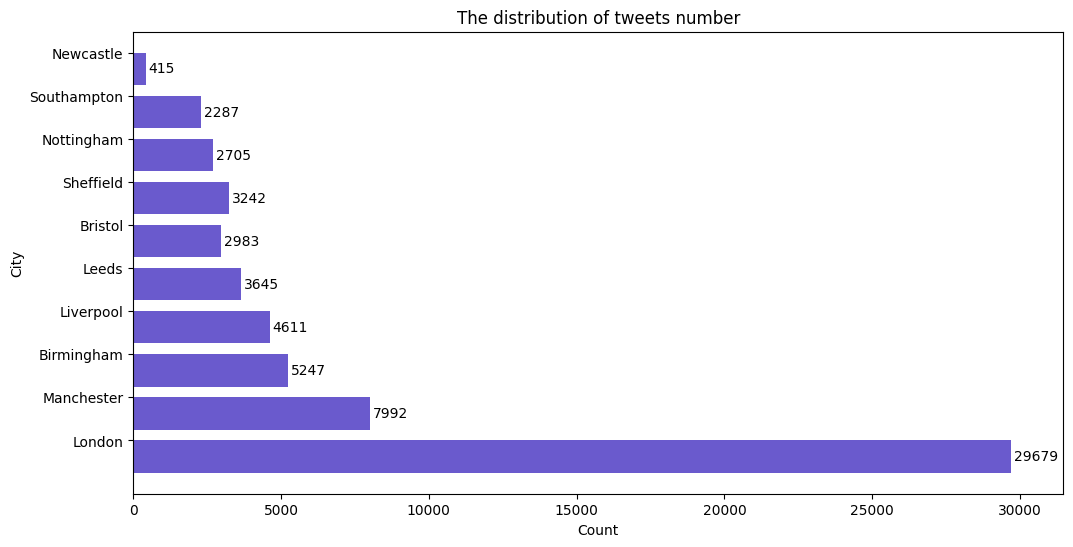

In [ ]:
#reference: https://stackoverflow.com/questions/60212294/how-to-add-labels-to-a-horizontal-bar-chart-in-matplotlib
import matplotlib.pyplot as plt # Importing the matplotlib.pyplot module and aliasing it as plt
import numpy as np

plt.rcParams["figure.figsize"] = (12,6)
fig, ax = plt.subplots()

width = 0.75 # bar's width
x_loc = np.arange(len(city_frame['total number']))  # the x locations
ax.barh(x_loc, city_frame['total number'], width, color="slateblue")
ax.set_yticks(x_loc+width/2)
ax.set_yticklabels(city_frame['city'], minor=False)

_, xmax = plt.xlim()
plt.xlim(0, xmax+300)
for i, v in enumerate(city_frame['total number']):
    ax.text(v + 100, i, str(v), color='black', fontsize=10, ha='left', va='center')

plt.title('The distribution of tweets number')
plt.xlabel('Count')
plt.ylabel('City')

# Create the 'visualizations' directory if it doesn't exist
os.makedirs('visualizations', exist_ok=True)

# plt.show()
plt.savefig("visualizations/tweets distribution") # Save to the created directory

In [ ]:
#The number of tweets collected in each city
#step 1
#London
London_df = clean_step_one[clean_step_one['near'].str.contains('London|london')]
London_df = London_df.reset_index(drop=True)
print("Step1 tweets in London:",len(London_df))
#Birmingham
Birmingham_df = clean_step_one[clean_step_one['near'].str.contains('Birmingham|birmingham')]
Birmingham_df = Birmingham_df.reset_index(drop=True)
print("Step1 tweets in Birmingham:",len(Birmingham_df))
#Bristol
Bristol_df = clean_step_one[clean_step_one['near'].str.contains('Bristol|Bristol')]
Bristol_df = Bristol_df.reset_index(drop=True)
print("Step1 tweets in Bristol:",len(Bristol_df))
#Leeds
Leeds_df = clean_step_one[clean_step_one['near'].str.contains('Leeds|leeds')]
Leeds_df = Leeds_df.reset_index(drop=True)
print("Step1 tweets in Leeds:",len(Leeds_df))
#Liverpool
Liverpool_df = clean_step_one[clean_step_one['near'].str.contains('Liverpool|liverpool')]
Liverpool_df = Liverpool_df.reset_index(drop=True)
print("Step1 tweets in Liverpool:",len(Liverpool_df))
#Manchester
Manchester_df = clean_step_one[clean_step_one['near'].str.contains('Manchester|manchester')]
Manchester_df = Manchester_df.reset_index(drop=True)
print("Step1 tweets in Manchester:",len(Manchester_df))
#Newcastle
Newcastle_df = clean_step_one[clean_step_one['near'].str.contains('Newcastle|newcastle')]
Newcastle_df = Newcastle_df.reset_index(drop=True)
print("Step1 tweets in Newcastle:",len(Newcastle_df))
#Nottingham
Nottingham_df = clean_step_one[clean_step_one['near'].str.contains('Nottingham|nottingham')]
Nottingham_df = Nottingham_df.reset_index(drop=True)
print("Step1 tweets in Nottingham:",len(Nottingham_df))
#Sheffield
Sheffield_df = clean_step_one[clean_step_one['near'].str.contains('Sheffield|sheffield')]
Sheffield_df = Sheffield_df.reset_index(drop=True)
print("Step1 tweets in Sheffield:",len(Sheffield_df))
#Southampton
Southampton_df = clean_step_one[clean_step_one['near'].str.contains('Southampton|southampton')]
Southampton_df = Southampton_df.reset_index(drop=True)
print("Step1 tweets in Southampton:",len(Southampton_df))

Step1 tweets in London: 12874
Step1 tweets in Birmingham: 2347
Step1 tweets in Bristol: 1284
Step1 tweets in Leeds: 1623
Step1 tweets in Liverpool: 2011
Step1 tweets in Manchester: 3304
Step1 tweets in Newcastle: 100
Step1 tweets in Nottingham: 1205
Step1 tweets in Sheffield: 1421
Step1 tweets in Southampton: 1139


In [ ]:
#step 2
#The number of tweets collected in each city
#London
London_df = clean_step_two[clean_step_two['near'].str.contains('London|london')]
London_df = London_df.reset_index(drop=True)
print("Step2 tweets in London:",len(London_df))
#Birmingham
Birmingham_df = clean_step_two[clean_step_two['near'].str.contains('Birmingham|birmingham')]
Birmingham_df = Birmingham_df.reset_index(drop=True)
print("Step2 tweets in Birmingham:",len(Birmingham_df))
#Bristol
Bristol_df = clean_step_two[clean_step_two['near'].str.contains('Bristol|Bristol')]
Bristol_df = Bristol_df.reset_index(drop=True)
print("Step2 tweets in Bristol:",len(Bristol_df))
#Leeds
Leeds_df = clean_step_two[clean_step_two['near'].str.contains('Leeds|leeds')]
Leeds_df = Leeds_df.reset_index(drop=True)
print("Step2 tweets in Leeds:",len(Leeds_df))
#Liverpool
Liverpool_df = clean_step_two[clean_step_two['near'].str.contains('Liverpool|liverpool')]
Liverpool_df = Liverpool_df.reset_index(drop=True)
print("Step2 tweets in Liverpool:",len(Liverpool_df))
#Manchester
Manchester_df = clean_step_two[clean_step_two['near'].str.contains('Manchester|manchester')]
Manchester_df = Manchester_df.reset_index(drop=True)
print("Step2 tweets in Manchester:",len(Manchester_df))
#Newcastle
Newcastle_df = clean_step_two[clean_step_two['near'].str.contains('Newcastle|newcastle')]
Newcastle_df = Newcastle_df.reset_index(drop=True)
print("Step2 tweets in Newcastle:",len(Newcastle_df))
#Nottingham
Nottingham_df = clean_step_two[clean_step_two['near'].str.contains('Nottingham|nottingham')]
Nottingham_df = Nottingham_df.reset_index(drop=True)
print("Step2 tweets in Nottingham:",len(Nottingham_df))
#Sheffield
Sheffield_df = clean_step_two[clean_step_two['near'].str.contains('Sheffield|sheffield')]
Sheffield_df = Sheffield_df.reset_index(drop=True)
print("Step2 tweets in Sheffield:",len(Sheffield_df))
#Southampton
Southampton_df = clean_step_two[clean_step_two['near'].str.contains('Southampton|southampton')]
Southampton_df = Southampton_df.reset_index(drop=True)
print("Step2 tweets in Southampton:",len(Southampton_df))

Step2 tweets in London: 8736
Step2 tweets in Birmingham: 1458
Step2 tweets in Bristol: 753
Step2 tweets in Leeds: 1029
Step2 tweets in Liverpool: 1375
Step2 tweets in Manchester: 2457
Step2 tweets in Newcastle: 115
Step2 tweets in Nottingham: 823
Step2 tweets in Sheffield: 1023
Step2 tweets in Southampton: 629


In [ ]:
#step 3
#The number of tweets collected in each city
#London
London_df = clean_step_three[clean_step_three['near'].str.contains('London|london', na=False)] # Add na=False to handle NaN values
London_df = London_df.reset_index(drop=True)
print("Step3 tweets in London:",len(London_df))
#Birmingham
Birmingham_df = clean_step_three[clean_step_three['near'].str.contains('Birmingham|birmingham', na=False)] # Add na=False to handle NaN values
Birmingham_df = Birmingham_df.reset_index(drop=True)
print("Step3 tweets in Birmingham:",len(Birmingham_df))
#Bristol
Bristol_df = clean_step_three[clean_step_three['near'].str.contains('Bristol|Bristol', na=False)] # Add na=False to handle NaN values
Bristol_df = Bristol_df.reset_index(drop=True)
print("Step3 tweets in Bristol:",len(Bristol_df))
#Leeds
Leeds_df = clean_step_three[clean_step_three['near'].str.contains('Leeds|leeds', na=False)] # Add na=False to handle NaN values
Leeds_df = Leeds_df.reset_index(drop=True)
print("Step3 tweets in Leeds:",len(Leeds_df))
#Liverpool
Liverpool_df = clean_step_three[clean_step_three['near'].str.contains('Liverpool|liverpool', na=False)] # Add na=False to handle NaN values
Liverpool_df = Liverpool_df.reset_index(drop=True)
print("Step3 tweets in Liverpool:",len(Liverpool_df))
#Manchester
Manchester_df = clean_step_three[clean_step_three['near'].str.contains('Manchester|manchester', na=False)] # Add na=False to handle NaN values
Manchester_df = Manchester_df.reset_index(drop=True)
print("Step3 tweets in Manchester:",len(Manchester_df))
#Newcastle
Newcastle_df = clean_step_three[clean_step_three['near'].str.contains('Newcastle|newcastle', na=False)] # Add na=False to handle NaN values
Newcastle_df = Newcastle_df.reset_index(drop=True)
print("Step3 tweets in Newcastle:",len(Newcastle_df))
#Nottingham
Nottingham_df = clean_step_three[clean_step_three['near'].str.contains('Nottingham|nottingham', na=False)] # Add na=False to handle NaN values
Nottingham_df = Nottingham_df.reset_index(drop=True)
print("Step3 tweets in Nottingham:",len(Nottingham_df))
#Sheffield
Sheffield_df = clean_step_three[clean_step_three['near'].str.contains('Sheffield|sheffield', na=False)] # Add na=False to handle NaN values
Sheffield_df = Sheffield_df.reset_index(drop=True)
print("Step3 tweets in Sheffield:",len(Sheffield_df))
#Southampton
Southampton_df = clean_step_three[clean_step_three['near'].str.contains('Southampton|southampton', na=False)] # Add na=False to handle NaN values
Southampton_df = Southampton_df.reset_index(drop=True)
print("Step3 tweets in Southampton:",len(Southampton_df))

Step3 tweets in London: 8069
Step3 tweets in Birmingham: 1442
Step3 tweets in Bristol: 946
Step3 tweets in Leeds: 993
Step3 tweets in Liverpool: 1225
Step3 tweets in Manchester: 2231
Step3 tweets in Newcastle: 200
Step3 tweets in Nottingham: 677
Step3 tweets in Sheffield: 798
Step3 tweets in Southampton: 519


In [ ]:
#stack bar chart
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Steps_df = pd.DataFrame([['Stage1', 12870, 3010, 1572, 1857, 2372, 3796, 239, 1315, 1604, 1287],
                   ['Stage2', 12945, 1905, 1003, 1214, 1652, 2838, 249, 942, 1185, 755],
                   ['Stage3', 11863, 1793, 1187, 1170, 1506, 2559, 364, 735, 931, 612]],
                  columns=['Stages', 'London','Birmingham','Bristol','Leeds','Liverpool','Manchester','Newcastle','Nottingham','Sheffield','Southampton'])
os.makedirs('visualizations/Drawing', exist_ok=True)
Steps_df.to_csv('visualizations/Drawing/three_steps_cities.csv',index = False, encoding='utf_8_sig')
Steps_df

,Stages,London,Birmingham,Bristol,Leeds,Liverpool,Manchester,Newcastle,Nottingham,Sheffield,Southampton
0,Stage1,12870,3010,1572,1857,2372,3796,239,1315,1604,1287
1,Stage2,12945,1905,1003,1214,1652,2838,249,942,1185,755
2,Stage3,11863,1793,1187,1170,1506,2559,364,735,931,612


(array([0, 1, 2]),
 [Text(0, 0, 'Stage1'), Text(1, 0, 'Stage2'), Text(2, 0, 'Stage3')])

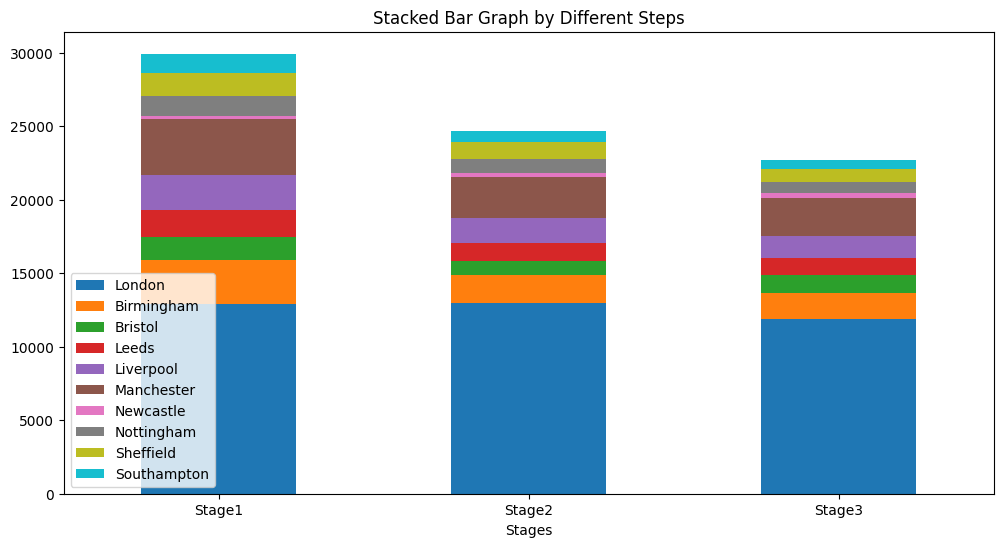

In [ ]:
# plt.xticks(rotation=0, ha='center')
Steps_df.plot(x='Stages', kind='bar', stacked=True,
        title='Stacked Bar Graph by Different Steps')
plt.xticks(rotation=0, ha='center')

In [ ]:
import pandas as pd
import numpy as np
import gensim
from gensim.models import Word2Vec
from nltk.tokenize import sent_tokenize, word_tokenize
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('all_clean_1.csv')
df

,created_at,user_id,username,tweet,place,near,id
0,2021-01-06,2.931752e+08,sjtafalla,UK Parliament: 2nd Covid Vaccine should be 21 ...,NaN,London,NaN
1,2021-01-06,1.591780e+09,ellieelif,First dose of vaccination 💉 5/1/2021..to comba...,NaN,London,NaN
2,2021-01-06,2.151437e+08,danananarama,"Time to forget about #COVID, #Brexit and #Trum...",NaN,London,NaN
3,2021-01-06,3.364621e+08,veronica_foote_,@doctor_oxford Rachel you absolutely nailed it...,NaN,London,NaN
4,2021-01-06,1.063706e+18,5herii,My kids can never say they don’t wanna do thei...,NaN,London,NaN
...,...,...,...,...,...,...,...
62802,2021-07-18,2.527371e+07,peter_henley,The Prime Minister and Chancellor have been co...,NaN,Southampton,NaN
62803,2021-07-18,2.527371e+07,peter_henley,Seems Dorset is learning some lessons about Co...,NaN,Southampton,NaN
62804,2021-07-18,2.018613e+08,charltonted,Track &amp; trace haven't tracked/traced the ...,NaN,Southampton,NaN
62805,2021-07-18,2.142202e+07,emerston,@markdavyd That’s because Covid comes from tho...,NaN,Southampton,NaN


In [ ]:
#sample data
positive_df = df[df["senti_vader"] == 1]
positive_df = positive_df[:1000] #1000 positive sentiment
neutral_df = df[df["senti_vader"] == 0]
neutral_df = neutral_df[:1000] #1000 neutral sentiment
negative_df = df[df["senti_vader"] == -1]
negative_df = negative_df[:1000] #1000 neutral sentiment

KeyError: 'senti_vader'